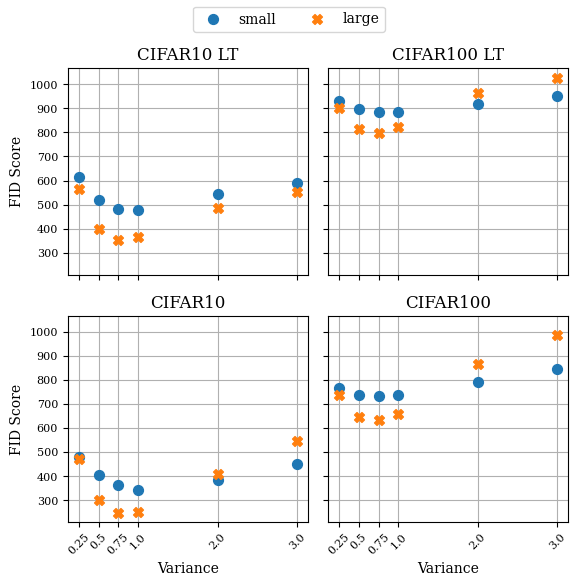

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('fid_results_64.csv')

# Define dataset names and new titles
ds_names = ['cifar10_0.01', 'cifar100_0.01', 'cifar10_bal', 'cifar100_bal']
plot_titles = ['CIFAR10 LT', 'CIFAR100 LT', 'CIFAR10', 'CIFAR100']

# Configure Matplotlib to use DejaVu Serif
plt.rc('font', family='serif')
plt.rc('font', serif='DejaVu Serif')
plt.rc('text', usetex=False)  # Disable LaTeX

# Define the figure width in points (1 * 15 cm in points)
fig_width_pt = 425.196
fig_width_in = fig_width_pt / 72.27
fig_height_in = fig_width_in

# Create subplots with adjusted size (reduce height)
# fig, axs = plt.subplots(2, 2, figsize=(14, 7))
fig, axs = plt.subplots(2, 2, figsize=(fig_width_in, fig_height_in), sharey=True, sharex=True)

# Markers and colors for different model sizes
markers = {'small': 'o', 'large': 'X'}
cmap = plt.get_cmap('tab10')
colors = {'small': cmap(0), 'large': cmap(1)}
font_size = 12

for i, dataset_name in enumerate(ds_names):
    subset = df[df['dataset_name'] == dataset_name]
    
    ax = axs[i // 2, i % 2]
    
    for model_size in ['small', 'large']:
        data = subset[subset['model_size'] == model_size]
        ax.scatter(data['var'], data['fid'], label=model_size if i == 0 else "", 
                   marker=markers[model_size], color=colors[model_size], s=50, zorder=5)
    
    if i // 2 == 1:
        ax.set_xlabel('Variance', fontsize=10)
    else:
        ax.set_xlabel('')
    
    if i % 2 == 0:
        ax.set_ylabel('FID Score', fontsize=10)
    else:
        ax.set_ylabel('')
    
    ax.set_xticks(sorted(subset['var'].unique()))
    ax.set_xticklabels(sorted(subset['var'].unique()), rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, zorder=0)
    ax.set_title(plot_titles[i], fontsize=12)

# Create a common legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=10, ncol=2)

# Adjust layout to make it more compact
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('fid_results.png', dpi=300, bbox_inches='tight')
plt.show()
